# Import Required Librraies

In [16]:
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Display Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [17]:
df = pd.read_csv("C:/Users/harsh/OneDrive/Desktop/Unified Mentor/Supermart Grocery Sales - Retail Analytics Dataset.csv")
df.head()


Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu

# Inspect Data Type and Summary

In [18]:
# Check data types and non-null counts
df.info()

# Summary statistics for numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.932881
min     500.000000     0.100000    25.250000
25%    1000.000000     0.160000   180.022500
50%    1498.000000     0.230000   320.780000
75%    1994.750000     0.290000   525.627500
max    2500.000000     0.350000  1120.950000

# Check for Missing and duplicated Data

In [19]:
# Missing values per column
missing = df.isnull().sum()
print("Missing values:\n", missing)

# Check for duplicate records
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Missing values:
 Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

Number of duplicate rows: 0


# Clean the Data

In [20]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Convert date column if applicable
if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


# Sales by Category

C:\Users\harsh\AppData\Local\Temp\ipykernel_32640\3574979260.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')


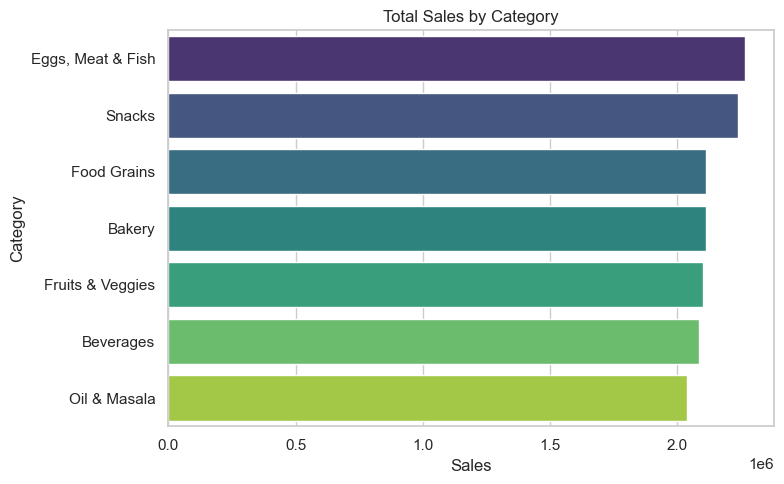

In [21]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


# Product by Sales

C:\Users\harsh\AppData\Local\Temp\ipykernel_32640\3418725530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


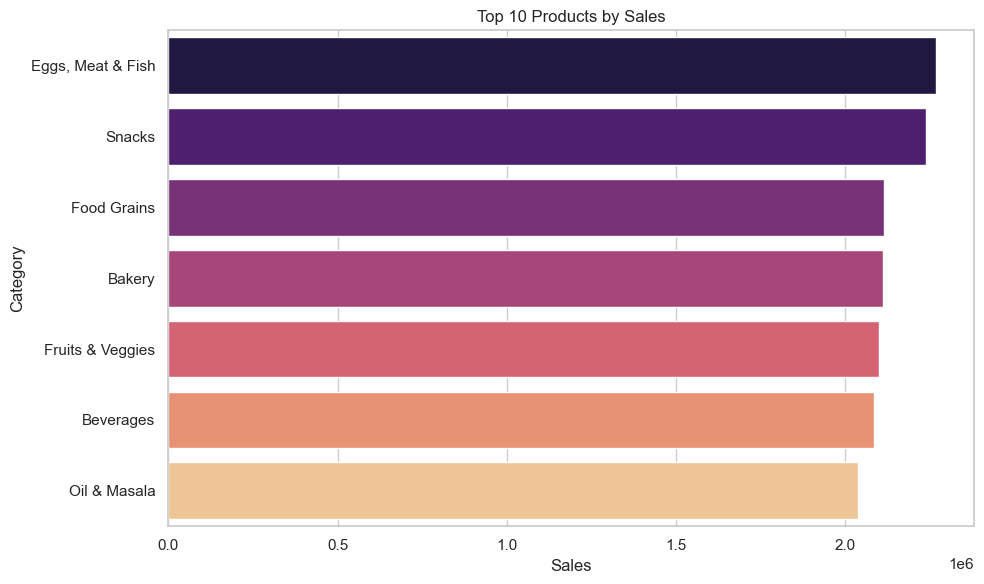

In [22]:
top_products = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


# Monthly Sales Trend

C:\Users\harsh\AppData\Local\Temp\ipykernel_32640\4221355423.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Order Date').resample('M')['Sales'].sum()


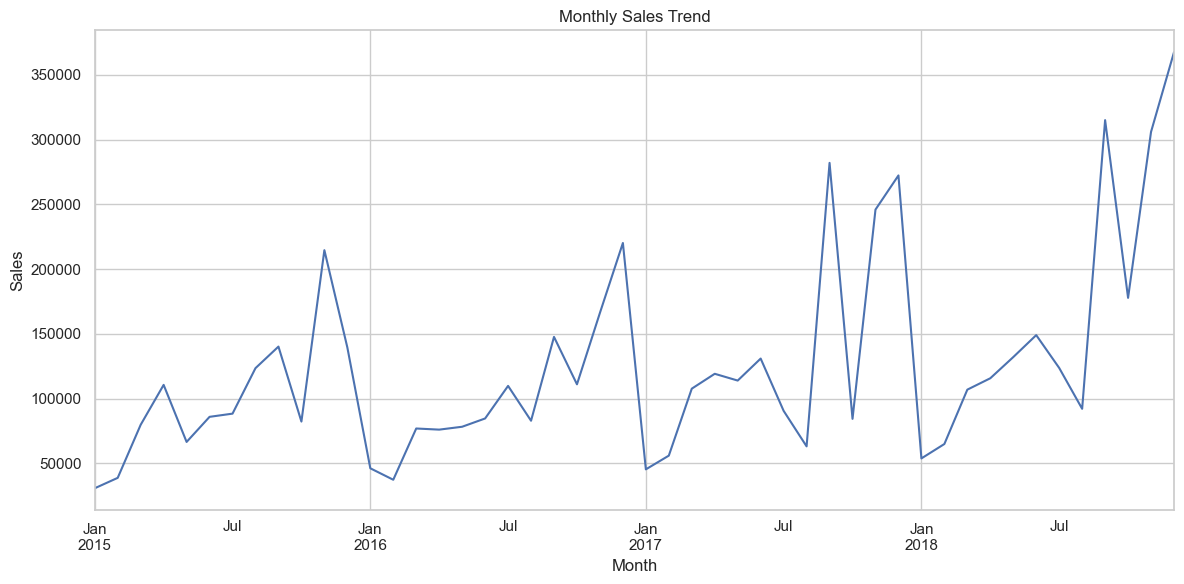

In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
monthly_sales = df.set_index('Order Date').resample('M')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


# Sales by Region

C:\Users\harsh\AppData\Local\Temp\ipykernel_32640\500193856.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='Set2')


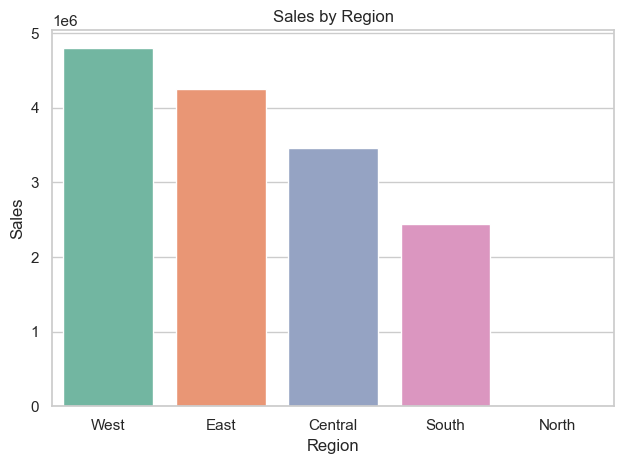

In [24]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values, palette='Set2')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


# Discount VS Profit

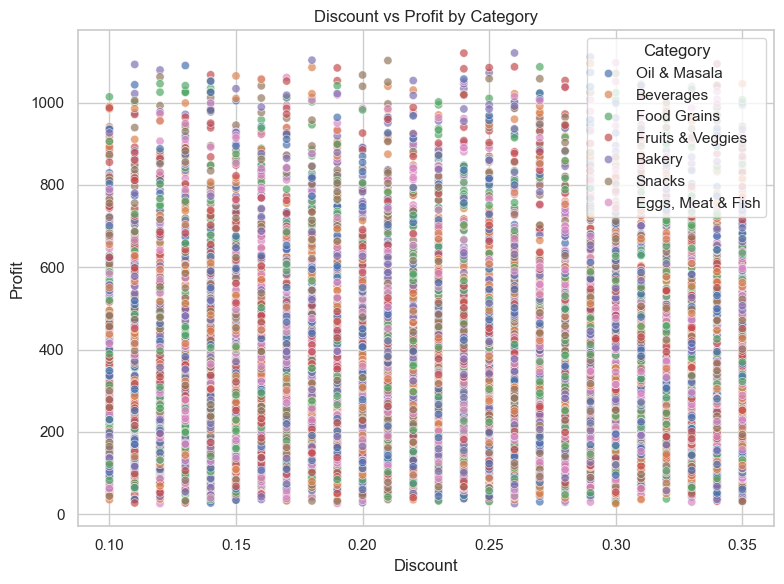

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.7)
plt.title('Discount vs Profit by Category')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()


# Sales Prediction Using ML

In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

# Load dataset
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")

# Feature selection
features = ['Discount', 'Profit']
target = 'Sales'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("📊 Data Preparation Complete")
print(f"Training Set Size: {X_train.shape[0]} rows")
print(f"Testing Set Size: {X_test.shape[0]} rows")

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

print("\n🔧 Model Training Complete")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"  {feature}: {coef:.2f}")

# Model prediction
y_pred = model.predict(X_test)

# Performance evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📈 Model Evaluation Results")
print(f"Mean Absolute Error (MAE): ₹{mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:.2f}")
print(f"R² Score (Coefficient of Determination): {r2:.4f}")

# Interpretation
print("\n📌 Interpretation:")
print("• MAE of ₹{:.2f} means that on average, our prediction is off by that amount.".format(mae))
print("• RMSE gives higher weight to larger errors; ours is ₹{:.2f}.".format(rmse))
print("• R² Score of {:.2f} indicates that {:.1f}% of the variance in Sales is explained by Discount and Profit.".format(r2, r2 * 100))
print("• This is a basic model. Adding more features (like Region, Sub Category) or transforming variables may improve results.")


📊 Data Preparation Complete
Training Set Size: 7995 rows
Testing Set Size: 1999 rows

🔧 Model Training Complete
Intercept: 946.82
Coefficients:
  Discount: -10.49
  Profit: 1.47

📈 Model Evaluation Results
Mean Absolute Error (MAE): ₹379.15
Root Mean Squared Error (RMSE): ₹460.92
R² Score (Coefficient of Determination): 0.3559

📌 Interpretation:
• MAE of ₹379.15 means that on average, our prediction is off by that amount.
• RMSE gives higher weight to larger errors; ours is ₹460.92.
• R² Score of 0.36 indicates that 35.6% of the variance in Sales is explained by Discount and Profit.
• This is a basic model. Adding more features (like Region, Sub Category) or transforming variables may improve results.


# Dashboard

In [31]:
import dash
from dash import html, dcc, Input, Output
import pandas as pd
import plotly.express as px

# Load data
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")

# Convert date column
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Initialize app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H2("Supermart Sales Dashboard", style={'textAlign': 'center'}),
    
    html.Div([
        html.Label("Select City"),
        dcc.Dropdown(options=[{'label': city, 'value': city} for city in df['City'].unique()],
                     id='city-dropdown', multi=True)
    ], style={'width': '50%'}),
    
    dcc.Graph(id='sales-category'),
    dcc.Graph(id='profit-region')
])

# Callback
@app.callback(
    [Output('sales-category', 'figure'),
     Output('profit-region', 'figure')],
    [Input('city-dropdown', 'value')]
)
def update_charts(selected_cities):
    dff = df.copy()
    if selected_cities:
        dff = dff[dff['City'].isin(selected_cities)]

    fig1 = px.bar(dff.groupby('Category')['Sales'].sum().reset_index(),
                  x='Category', y='Sales', title='Sales by Category')
    
    fig2 = px.pie(dff.groupby('Region')['Profit'].sum().reset_index(),
                  names='Region', values='Profit', title='Profit by Region')

    return fig1, fig2

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


# Insights and recommendation

In [39]:
# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Aggregate calculations
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
subcat_profit = df.groupby('Sub Category')['Profit'].sum().sort_values(ascending=False)

# Show insights
print("\n🔍 BUSINESS INSIGHTS:")
print("1️⃣ Top Performing Categories by Sales:\n", category_sales)
print("\n2️⃣ Regions by Total Profit:\n", region_profit)
print("\n3️⃣ Cities with Highest Sales:\n", city_sales.head(5))
print("\n4️⃣ Most Profitable Sub-Categories:\n", subcat_profit.head(5))

# Recommendations
print("\n📢 ACTIONABLE RECOMMENDATIONS:")
print("• Focus marketing in top-performing cities like {}.".format(city_sales.idxmax()))
print("• Optimize inventory and pricing strategies for '{}' category with highest sales.".format(category_sales.idxmax()))
print("• Increase promotional offers in regions with lower profit to balance margin gaps.")
print("• Expand product lines in high-profit sub-categories like '{}'.".format(subcat_profit.idxmax()))
print("• Monitor discounts carefully – while it can boost sales, it might reduce net profit if overused.")



🔍 BUSINESS INSIGHTS:
1️⃣ Top Performing Categories by Sales:
 Category
Eggs, Meat & Fish    2267401
Snacks               2237546
Food Grains          2115272
Bakery               2112281
Fruits & Veggies     2100727
Beverages            2085313
Oil & Masala         2038442
Name: Sales, dtype: int64

2️⃣ Regions by Total Profit:
 Region
West       1192004.61
East       1074345.58
Central     856806.84
South       623562.89
North          401.28
Name: Profit, dtype: float64

3️⃣ Cities with Highest Sales:
 City
Kanyakumari    706764
Vellore        676550
Bodi           667177
Tirunelveli    659812
Perambalur     659738
Name: Sales, dtype: int64

4️⃣ Most Profitable Sub-Categories:
 Sub Category
Health Drinks    267469.79
Soft Drinks      258135.97
Noodles          193685.81
Breads & Buns    190764.98
Cookies          190643.70
Name: Profit, dtype: float64

📢 ACTIONABLE RECOMMENDATIONS:
• Focus marketing in top-performing cities like Kanyakumari.
• Optimize inventory and pricing strategi